# USA_Housing Dataset - KNN REGRESSION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

# importing all libraries and dependencies for machine learning


from sklearn.preprocessing import MinMaxScaler  ## For scaling the data before training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r_squared
from sklearn.neighbors import KNeighborsRegressor 
import random

## Importing the data

In [2]:
path = "C:/Users/miihi/Data/DecodR/Linear Regression/USA_Housing.csv"
df = pd.read_csv(path)
print(df.shape)
df.head(3)

(5000, 7)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


## understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


1. From the above info, we understand that only Adress column is a factor column and rest all are Numeric columns. 
2. Address column is not going to affect in the prediction, hence we drop the address column
3. None of the columns are having any NULL values

### Dropping the Factor(Address) column

In [4]:
df = df.drop('Address', 1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


## Converting all column names to lower case

In [5]:
df = df.rename(columns = lambda x : x.strip().lower())
df.columns

Index(['avg. area income', 'avg. area house age', 'avg. area number of rooms',
       'avg. area number of bedrooms', 'area population', 'price'],
      dtype='object')

## Making BOXPLOT for various columns to visuallize the outliers

C:\Users\miihi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


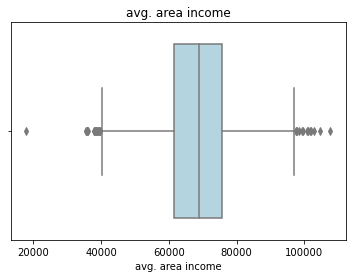

C:\Users\miihi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


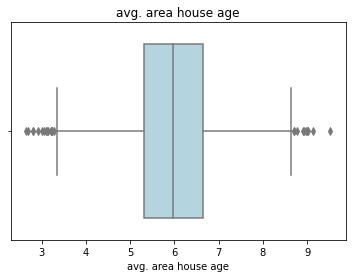

C:\Users\miihi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


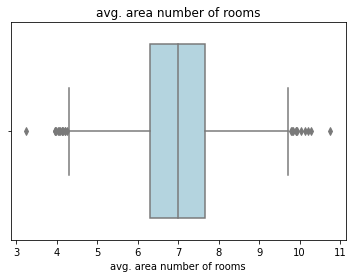

C:\Users\miihi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


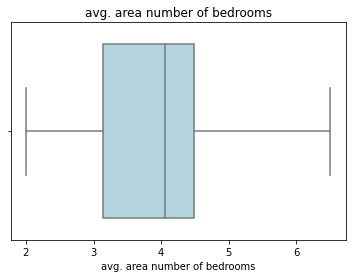

C:\Users\miihi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


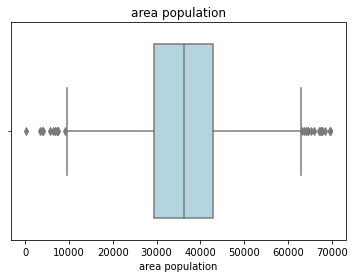

C:\Users\miihi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


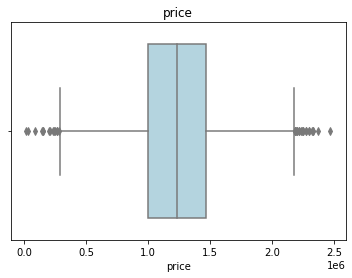

In [6]:
for i in ['avg. area income', 'avg. area house age', 'avg. area number of rooms', 'avg. area number of bedrooms', 'area population', 'price']:
    sns.boxplot(df[i],color="lightblue" )
    plt.title(i)
    plt.show()

## Function to FIND outliers

In [7]:
def find_outliers(ds, col):
    
    q1 = ds[col].quantile(0.25)
    q3 = ds[col].quantile(0.75)
    iqr = q3 - q1
    
    uw = q3 + 1.5 * iqr
    lw = q1 - 1.5 * iqr
    
    lst = ds.index[ (ds[col] < lw) | (ds[col] > uw)]
    
    return lst

# CREATING EMPTY LIST TO STORE OUTLIERS FROM THE MULTIPLE COLUMNS:

index_list = []

for feature in ['avg. area income', 'avg. area house age', 'avg. area number of rooms', 'avg. area number of bedrooms', 'area population', 'price']:
    index_list.extend(find_outliers(df, feature))
    
len(index_list)

146

## Function to REMOVE Outliers

In [8]:
def rem_out(ds, lst):
    lst = sorted(set(lst))
    data = ds.drop(lst)
    return data

df_clean = rem_out(df, index_list)
df_clean.shape

(4865, 6)

## Making boxplot of 1 feature to confirm the removal of the outliers

C:\Users\miihi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\miihi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clean Data - Feature = avg. area income')

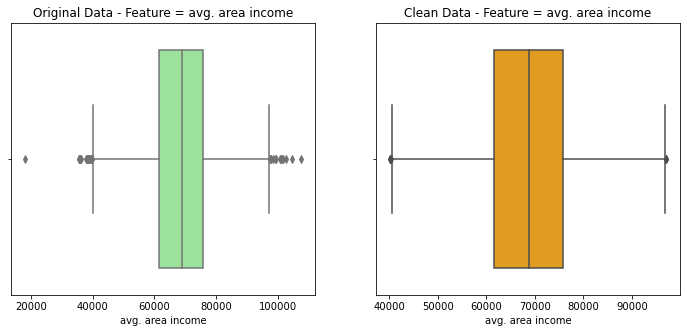

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(df['avg. area income'], color="lightgreen")
plt.title("Original Data - Feature = avg. area income")


plt.subplot(1,2,2)
sns.boxplot(df_clean['avg. area income'], color="orange")
plt.title("Clean Data - Feature = avg. area income")

In [10]:
df.columns

Index(['avg. area income', 'avg. area house age', 'avg. area number of rooms',
       'avg. area number of bedrooms', 'area population', 'price'],
      dtype='object')

In [11]:
df_clean.columns

Index(['avg. area income', 'avg. area house age', 'avg. area number of rooms',
       'avg. area number of bedrooms', 'area population', 'price'],
      dtype='object')

### Seperating the target Variable

In [12]:
y = df_clean['price']
print("Y dimensions:",y.shape)

y.head(2)

Y dimensions: (4865,)


0    1.059034e+06
1    1.505891e+06
Name: price, dtype: float64

In [13]:
df_clean = df_clean.drop(['price'], 1)
df_clean.head(2)

,avg. area income,avg. area house age,avg. area number of rooms,avg. area number of bedrooms,area population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174


In [15]:
x = df_clean[ : ]
print("X dimensions:",x.shape)


X dimensions: (4865, 5)


## Using Heatmap to check Multicollinearity among the variables

<AxesSubplot:>

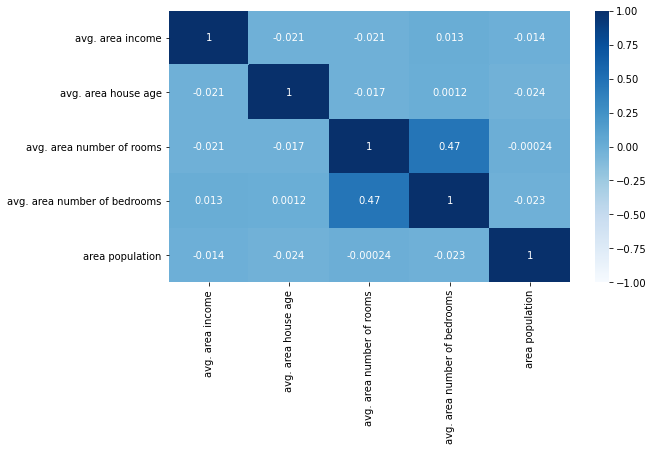

In [30]:
plt.figure(figsize=(9,5))

sns.heatmap(df_clean.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'Blues')

## Scaling the data using MinMax Scaler

In [16]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.69165074, 0.44162376, 0.50114826, 0.46444444, 0.25429952],
       [0.68644077, 0.50201725, 0.44984134, 0.24222222, 0.57381341],
       [0.37116387, 0.47616251, 0.77827134, 0.69555556, 0.51227322],
       ...,
       [0.4080884 , 0.73746519, 0.09490082, 0.02888889, 0.44465364],
       [0.48901836, 0.41360589, 0.52344207, 0.76444444, 0.61967615],
       [0.4452986 , 0.50001799, 0.46117943, 0.46      , 0.69215119]])

### Converting the scaled variable to a dataframe

In [18]:
x = pd.DataFrame(x_scaled, columns= df_clean.columns)
x.head()

,avg. area income,avg. area house age,avg. area number of rooms,avg. area number of bedrooms,area population
0,0.691651,0.441624,0.501148,0.464444,0.254300
1,0.686441,0.502017,0.449841,0.242222,0.573813
2,0.371164,0.476163,0.778271,0.695556,0.512273
3,0.407291,0.725698,0.238969,0.280000,0.464178
4,0.348260,0.320416,0.654166,0.495556,0.315398


## Splitting the data into training and testing

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 100)

## Implementing the KNN Regressor

In [22]:
# CREATING THE MODEL
reg_model = KNeighborsRegressor(n_neighbors=5)

# FITTING THE MODEL
reg_model.fit(xtrain, ytrain)

# PREDICTING OVER THE TRAINING DATASET AND CALCULATING THE  MAE, MSE, RMASE, R2_SCORE
pred = reg_model.predict(xtest)

print("MEAN ABSOLUTE ERROR:", np.round(mae(ytest, pred), 2))
print("\n")
print("MEAN SQUARED ERROR:", np.round(mse(ytest, pred), 2))
print("\n")
print("ROOT MEAN SQUARE ERROR:", np.round(np.sqrt(mse(ytest, pred)),2))
print("\n")
print("R SQUARE VALUE:", np.round(r_squared(ytest, pred),2))
print("\n")

MEAN ABSOLUTE ERROR: 100174.67


MEAN SQUARED ERROR: 15454488223.22


ROOT MEAN SQUARE ERROR: 124316.08


R SQUARE VALUE: 0.86




- Here we have used the default value of the n_neighbours as 5 ( = k).
- Inorder to get the best value of k, we use ELBOW CURVE.

## Function For Elbow Curve

In [23]:
k = range(1,41)

def elbow(k):
    data = pd.DataFrame(columns = ['Neighbours', 'MAE', 'MSE', 'RMSE', 'R2 SCORE'])
    mse_plot = []   
    for i in k:
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(xtrain, ytrain)
        predicted = model.predict(xtest)
        
        t_mae = np.round(mae(ytest, predicted), 2)
        t_mse = np.round(mse(ytest, predicted),1)
        t_rmse = np.round(np.sqrt(mse(ytest, predicted)),2)
        t_r2 = np.round(r_squared(ytest, predicted),2)
        
        
        ## Datafreame for MAE, MSE, RMSE, R2_SCORE
        data = data.append({'Neighbours':i,'MAE': t_mae, 'MSE': t_mse, 'RMSE': t_rmse,
                            'R2 SCORE': t_r2}, ignore_index = True)
        
        mse_plot.append(t_mse)
        
    return data, mse_plot

### PERFORMANCE PARAMETERS

In [24]:
elbow(k)[0].head()  ## using index 0 since we want only the dataframe of mae, mse, rmse,r2.... 
# in order to get the mse_plot list we will use elbow(k)[1] - index 1 is for the mse_plot list

,Neighbours,MAE,MSE,RMSE,R2 SCORE
0,1.0,132624.22,2.728071e+10,165168.72,0.76
1,2.0,114559.00,2.037408e+10,142737.82,0.82
2,3.0,104911.21,1.725895e+10,131373.32,0.85
3,4.0,101253.98,1.597122e+10,126377.30,0.86
4,5.0,100174.67,1.545449e+10,124316.08,0.86


In [25]:
mse_list = elbow(k)[1]
print(mse_list)

[27280705068.1, 20374084640.6, 17258949388.2, 15971223189.2, 15454488223.2, 15185192001.4, 14864365459.6, 14761655963.1, 14555279820.1, 14242278391.8, 14642105051.9, 14578650261.2, 14363985414.7, 14252150377.9, 14269294116.0, 14290669263.7, 14269320001.2, 14387590434.1, 14434817595.4, 14685130059.2, 14747054063.5, 14855935438.9, 14907187890.7, 14929314544.5, 14995376987.2, 15129198203.8, 15203323231.2, 15294170793.7, 15354691777.8, 15441061476.4, 15562390389.1, 15594157437.6, 15736161530.5, 15768651091.8, 15869181147.6, 15893196820.4, 15853213506.5, 15899318330.7, 16021362780.8, 16086494684.1]


## Plotting the elbow curve

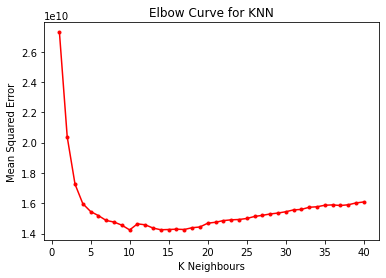

In [26]:
plt.plot(k, mse_list , color = "red", marker=".")
plt.title("Elbow Curve for KNN")
plt.xlabel("K Neighbours")
plt.ylabel("Mean Squared Error")
plt.show()

From the above graph we can see that the **minimum MSE** is for **10 Neighbours** so now we set KNN n_neighbours = 9 and repeat the entire process.

# FINAL MODEL

In [27]:
# CREATING THE MODEL
final_model = KNeighborsRegressor(n_neighbors=10)

# FITTING THE MODEL
final_model.fit(xtrain, ytrain)

#PREDICTING USING THE FINAL MODEL
final_pred = final_model.predict(xtest)

#  MSE OF THE FINAL MODEL
print("MEAN SQUARED ERROR:", np.round(mse(ytest, final_pred), 2))

MEAN SQUARED ERROR: 14242278391.79


In [94]:
15454488223.22 - 14242278391.79



1212209831.4299984

Hence we see that the MSE has reduced by 1212209831.42

MSE of lm model = 87365842697.04

In [95]:
87365842697.04 - 14242278391.79

73123564305.25

MSE has decreased by 73123564305.25 in KNN regression over Linear Regression 

Hence KNN regression seems to be a better fit

### Dataframe for predicted values and residuals

In [28]:
pred_red_df = pd.DataFrame({'Actual Values': ytest, 'Predicted Values': final_pred, 'Residuals': ytest - final_pred})
pred_red_df.head()

,Actual Values,Predicted Values,Residuals
3532,1.187114e+06,1.207939e+06,-20824.960553
2212,1.217061e+06,1.234778e+06,-17716.693689
2765,1.730084e+06,1.630631e+06,99453.498731
4731,1.628830e+06,1.557584e+06,71246.028281
3565,6.652670e+05,8.174856e+05,-152218.670122


### Plotting the actual values vs predicted values

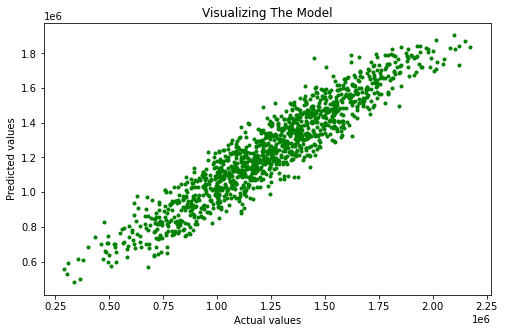

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(ytest, final_pred, marker=".", c = "green")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Visualizing The Model")
plt.show()

The KNN model seems to be a really good fit to the data.

The plot shows Linear Regression